In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

c:\users\asus-\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (71,73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE    ...     mfrCode  c240Dscr  charge240b  \
0       0.0     0.0    0.0    ...         NaN       NaN         0.0   
1       0.0     0.0    0.0    ...         NaN       NaN         0.0   
2       0.0     0.0    0.0    ...         NaN       NaN         0.0   
3       0.0     0.0    0.0    ...         NaN       NaN         0.0   
4       0.0     0.0    0.0    ...         NaN       NaN         0.0   

   c240bDscr                     createdOn                    modifiedOn  \
0        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
1        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
2        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
3        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
4        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   

   startStop  phevCity  phevHwy  phevComb  
0        NaN         0        0         0  
1        NaN         0        0         0  
2        NaN         0        0         0  
3        NaN         0        0         0  
4        NaN         0        0         0  

[5 rows x 83 columns]

In [3]:
vehicles.shape

(39796, 83)

In [4]:
vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [5]:
vehicles.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64
U

In [6]:
pd.value_counts(vehicles['fuelType1'])

Regular Gasoline     27201
Premium Gasoline     11151
Diesel                1123
Electricity            165
Midgrade Gasoline       96
Natural Gas             60
Name: fuelType1, dtype: int64

In [7]:
pd.value_counts(vehicles['trany'])

Automatic 4-spd                     11045
Manual 5-spd                         8345
Automatic 3-spd                      3151
Automatic (S6)                       2952
Manual 6-spd                         2649
Automatic 5-spd                      2198
Automatic 6-spd                      1541
Manual 4-spd                         1483
Automatic (S8)                       1353
Automatic (S5)                        830
Automatic (variable gear ratios)      756
Automatic 7-spd                       708
Automatic (AM-S7)                     357
Automatic 8-spd                       337
Automatic (S7)                        303
Automatic (S4)                        233
Automatic (AM7)                       212
Automatic 9-spd                       195
Automatic (AV-S6)                     186
Automatic (A1)                        160
Automatic (AM6)                       136
Automatic (AM-S6)                     113
Automatic (AV-S7)                     113
Manual 7-spd                      

In [8]:
trany_ = vehicles['trany'].str[0]
pd.value_counts(trany_)

A    27107
M    12678
Name: trany, dtype: int64

In [9]:
pd.value_counts(vehicles['make'])

Chevrolet                             3908
Ford                                  3263
Dodge                                 2559
GMC                                   2442
Toyota                                2002
BMW                                   1854
Mercedes-Benz                         1444
Nissan                                1420
Volkswagen                            1151
Mitsubishi                            1048
Porsche                                998
Mazda                                  982
Audi                                   965
Honda                                  960
Jeep                                   900
Pontiac                                893
Subaru                                 866
Volvo                                  787
Hyundai                                721
Chrysler                               718
Buick                                  650
Mercury                                609
Kia                                    564
Cadillac   

In [10]:
greatmaker = pd.DataFrame(data = pd.value_counts(vehicles['make']))
greatmaker = greatmaker.where(greatmaker['make']>1000).dropna()
greatmaker

make
Chevrolet      3908.0
Ford           3263.0
Dodge          2559.0
GMC            2442.0
Toyota         2002.0
BMW            1854.0
Mercedes-Benz  1444.0
Nissan         1420.0
Volkswagen     1151.0
Mitsubishi     1048.0

In [11]:
column_names = vehicles.columns
column_names[[71,73,74,76]]

Index(['rangeA', 'mfrCode', 'c240Dscr', 'c240bDscr'], dtype='object')

In [12]:
for col in column_names[[71,73,74,76]]:
    del vehicles[col]

In [13]:
vehicles.shape

(39796, 79)

In [14]:
pd.unique(vehicles['displ'])

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6,
       5.4, 5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7, 4.4,
       3.7, 6.7, 4.8, nan, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.6,
       0. , 0.9])

In [15]:
pd.unique(vehicles['comb08'])

array([ 21,  11,  27,  19,  22,  25,  24,  26,  13,  23,  20,  16,  18,
        17,  15,  10,  14,  12,  28,  34,  30,  33,  31,  41,  40,  47,
        38,  36,  32,  43,  29,   8,  35,   9,  37,  53,  85,  72,  46,
         7,  48,  65,  39,  75,  78,  52,  42,  50,  58,  56,  55,  98,
        99,  87,  44, 112,  62, 102,  73, 105,  89, 118, 107, 121,  76,
        95, 116, 115,  94, 119, 114,  63, 124,  84,  93, 100, 101,  92,
       103, 104, 136,  49,  86,  54, 108, 126, 130], dtype=int64)

In [16]:
c = vehicles['displ'].notnull()
vehicles = vehicles[c]

In [17]:
pd.unique(vehicles['displ'])

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6,
       5.4, 5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7, 4.4,
       3.7, 6.7, 4.8, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.6, 0. ,
       0.9])

In [18]:
grouped = vehicles.groupby('year')
averaged = grouped['comb08','highway08',\
                   'city08'].agg([np.mean])
averaged.columns = ['comb08_mean','highway08_mean',\
                    'city08_mean']
print(averaged.head(8))
print(averaged.tail(8))

      comb08_mean  highway08_mean  city08_mean
year                                          
1984    19.881874       23.075356    17.982688
1985    19.804002       23.037081    17.874044
1986    19.550413       22.699174    17.665289
1987    19.228549       22.445068    17.310345
1988    19.328319       22.702655    17.333628
1989    19.125759       22.465742    17.143972
1990    19.000928       22.337662    17.033395
1991    18.825972       22.253534    16.848940
      comb08_mean  highway08_mean  city08_mean
year                                          
2012    21.344435       25.690622    18.843996
2013    22.212821       26.727350    19.633333
2014    22.565506       27.149254    19.956053
2015    22.910317       27.584921    20.218254
2016    23.338223       27.960065    20.652812
2017    23.384798       27.884402    20.738717
2018    23.547417       27.998458    20.931380
2019    23.287611       28.004425    20.539823


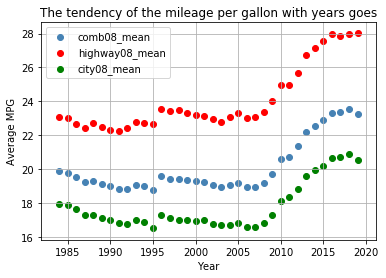

In [19]:
plt.title('The tendency of the mileage per gallon with years goes')
plt.scatter(averaged.index,averaged['comb08_mean'],color='steelblue')
plt.scatter(averaged.index,averaged['highway08_mean'],color='red')
plt.scatter(averaged.index,averaged['city08_mean'],color='green')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.legend(loc=2)
plt.savefig("pyplot1.png")
plt.show()

In [20]:
c1 = vehicles.fuelType1.isin(['Regular Gasoline', 
            'Premium Gasoline', 'Midgrade Gasoline'])
c2 = vehicles.fuelType2.isnull()
c3 = vehicles.atvType != 'Hybrid'
vehicles_nothybrid = vehicles[c1 & c2 & c3]
vehicles_nothybrid.shape

(36385, 79)

In [21]:
grouped = vehicles_nothybrid.groupby('year')
averaged = grouped['comb08'].agg([np.mean])
averaged.columns = ['comb08_mean']
print(averaged.head(8))
print(averaged.tail(8))

      comb08_mean
year             
1984    19.121622
1985    19.389358
1986    19.320457
1987    19.164568
1988    19.367607
1989    19.141964
1990    19.031459
1991    18.838060
      comb08_mean
year             
2012    21.407328
2013    22.228877
2014    22.279835
2015    22.418539
2016    22.742509
2017    22.802867
2018    22.877533
2019    23.054299


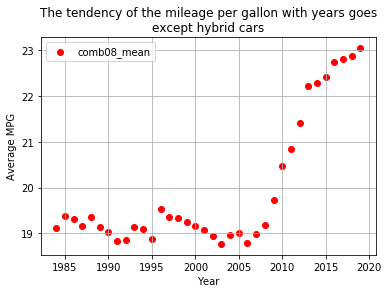

In [22]:
plt.title('The tendency of the mileage per gallon with years goes\nexcept hybrid cars')
plt.scatter(averaged.index, averaged['comb08_mean'], color='red')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.legend(loc=2)
plt.savefig('pyplot2.png')
plt.show()

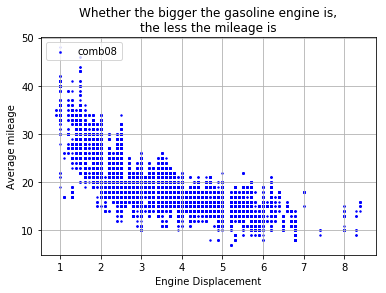

In [23]:
plt.title('Whether the bigger the gasoline engine is,\nthe less the mileage is')
plt.scatter(vehicles_nothybrid['displ'],vehicles_nothybrid['comb08'],color='blue',s=2)
plt.xlabel('Engine Displacement')
plt.ylabel('Average mileage')
plt.grid(True)
plt.legend(loc=2)
plt.savefig('pyplot3.png')
plt.show()

In [24]:
group_by_year = vehicles_nothybrid.groupby('year')
avg_grouped_by_year = group_by_year['displ','comb08'].agg([np.mean])
avg_grouped_by_year.columns = ['displ_mean','comb08_mean']
print(avg_grouped_by_year.head(8))
print(avg_grouped_by_year.tail(8))

      displ_mean  comb08_mean
year                         
1984    3.068449    19.121622
1985    3.075990    19.389358
1986    3.126514    19.320457
1987    3.096474    19.164568
1988    3.113558    19.367607
1989    3.133393    19.141964
1990    3.145472    19.031459
1991    3.178957    18.838060
      displ_mean  comb08_mean
year                         
2012    3.350862    21.407328
2013    3.220107    22.228877
2014    3.264609    22.279835
2015    3.241760    22.418539
2016    3.142603    22.742509
2017    3.102240    22.802867
2018    3.050837    22.877533
2019    2.921267    23.054299


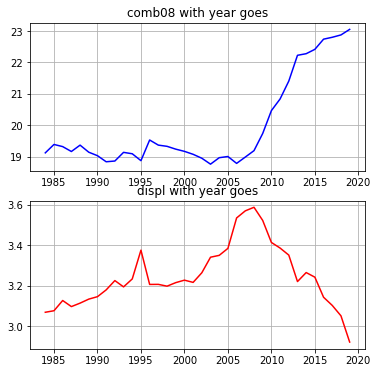

In [25]:
gs = plt.GridSpec(2,2)
fig = plt.figure(figsize=(6,6))
s1 = fig.add_subplot(gs[0,:2])
s1.plot(avg_grouped_by_year.index,avg_grouped_by_year['comb08_mean'],c='blue')
plt.title('comb08 with year goes')
plt.grid(True)
s2 = fig.add_subplot(gs[1,:2])
s2.plot(avg_grouped_by_year.index,avg_grouped_by_year['displ_mean'],c='red')
plt.title('displ with year goes')
plt.grid(True)
plt.savefig('pyplot4.png')
plt.show()

In [26]:
pd.unique(vehicles_nothybrid['cylinders'])

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [27]:
vehicles_nothybrid_4 = vehicles_nothybrid[(vehicles_nothybrid['cylinders'] == 4.)]
grouped_4 = vehicles_nothybrid_4.groupby(['year'])['make'].nunique()
print(grouped_4.head(8))
print(grouped_4.tail(8))

year
1984    37
1985    36
1986    37
1987    38
1988    42
1989    37
1990    35
1991    38
Name: make, dtype: int64
year
2012    26
2013    28
2014    27
2015    31
2016    31
2017    32
2018    31
2019    19
Name: make, dtype: int64


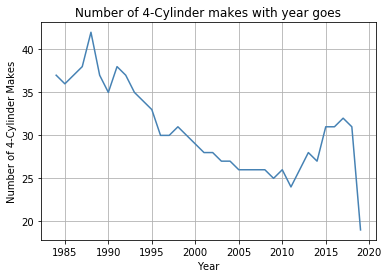

In [28]:
plt.title('Number of 4-Cylinder makes with year goes')
fig = grouped_4.plot(color='steelblue')
plt.grid(True)
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
plt.savefig('pyplot5.png')
plt.show()

In [29]:
years = pd.unique(vehicles_nothybrid_4['year'])
years
total_makes = set(vehicles_nothybrid_4['make'])
for y in years:
    vehicles_y = vehicles_nothybrid_4.where(vehicles_nothybrid_4['year']==y)
    makes_y = set(vehicles_y['make'])
    total_makes = total_makes.intersection(makes_y)
print(total_makes)

{'Toyota', 'Honda', 'Volkswagen', 'Jeep', 'Subaru', 'Mazda'}


In [30]:
common_makes_bool = (vehicles_nothybrid_4['make'].isin(total_makes))

In [31]:
common_makes = vehicles_nothybrid_4[common_makes_bool]

In [32]:
common_makes[['year','make']]

year        make
4      1993      Subaru
5      1993      Subaru
6      1993      Subaru
7      1993      Toyota
8      1993      Toyota
9      1993      Toyota
10     1993      Toyota
11     1993  Volkswagen
12     1993  Volkswagen
13     1993  Volkswagen
15     1993  Volkswagen
75     1993       Mazda
76     1993       Mazda
103    1993      Toyota
104    1993      Toyota
107    1993  Volkswagen
108    1993  Volkswagen
164    1993       Honda
165    1993       Honda
173    1993      Subaru
174    1993      Subaru
175    1993      Subaru
176    1993      Subaru
177    1993      Subaru
178    1993      Subaru
179    1993      Subaru
181    1993      Toyota
182    1993      Toyota
227    1993      Toyota
229    1993  Volkswagen
...     ...         ...
39572  1993       Mazda
39573  1993       Mazda
39575  1985      Toyota
39578  1993       Mazda
39579  1993       Mazda
39586  1985      Toyota
39648  1993      Toyota
39649  1993      Toyota
39650  1993      Toyota
39651  1993      Toyota
39653  1993      Toyota
39654  1993      Toyota
39655  1993      Toyota
39656  1993      Toyota
39659  1993  Volkswagen
39718  1993       Honda
39720  1993       Honda
39744  1993       Mazda
39745  1993       Mazda
39746  1993       Mazda
39747  1993       Mazda
39748  1993       Mazda
39749  1993       Mazda
39750  1993       Mazda
39751  1993       Mazda
39791  1993      Subaru
39792  1993      Subaru
39793  1993      Subaru
39794  1993      Subaru
39795  1993      Subaru

[4204 rows x 2 columns]

In [33]:
common_makes_grouped = common_makes.groupby(['year','make']).agg(np.mean).reset_index()
common_makes_grouped

year        make  barrels08  barrelsA08  charge120  charge240     city08  \
0    1984       Honda  12.012900         0.0        0.0        0.0  25.708333   
1    1984        Jeep  16.310463         0.0        0.0        0.0  18.350000   
2    1984       Mazda  13.890349         0.0        0.0        0.0  22.444444   
3    1984      Subaru  14.516825         0.0        0.0        0.0  21.264706   
4    1984      Toyota  14.284455         0.0        0.0        0.0  22.368421   
5    1984  Volkswagen  15.135819         0.0        0.0        0.0  20.529412   
6    1985       Honda  12.602361         0.0        0.0        0.0  24.718750   
7    1985        Jeep  17.936831         0.0        0.0        0.0  17.130435   
8    1985       Mazda  13.282570         0.0        0.0        0.0  23.333333   
9    1985      Subaru  14.629576         0.0        0.0        0.0  21.024390   
10   1985      Toyota  14.423676         0.0        0.0        0.0  21.791667   
11   1985  Volkswagen  15.697928         0.0        0.0        0.0  19.882353   
12   1986       Honda  12.324364         0.0        0.0        0.0  25.350000   
13   1986        Jeep  16.930241         0.0        0.0        0.0  18.166667   
14   1986       Mazda  14.269354         0.0        0.0        0.0  21.181818   
15   1986      Subaru  14.572178         0.0        0.0        0.0  21.000000   
16   1986      Toyota  15.276032         0.0        0.0        0.0  20.625000   
17   1986  Volkswagen  15.823266         0.0        0.0        0.0  20.058824   
18   1987       Honda  12.263761         0.0        0.0        0.0  25.350000   
19   1987        Jeep  17.198812         0.0        0.0        0.0  17.846154   
20   1987       Mazda  15.796451         0.0        0.0        0.0  19.470588   
21   1987      Subaru  14.809485         0.0        0.0        0.0  20.476190   
22   1987      Toyota  15.134735         0.0        0.0        0.0  20.696429   
23   1987  Volkswagen  15.506411         0.0        0.0        0.0  20.450000   
24   1988       Honda  12.301065         0.0        0.0        0.0  25.291667   
25   1988        Jeep  17.159626         0.0        0.0        0.0  17.538462   
26   1988       Mazda  15.830070         0.0        0.0        0.0  19.000000   
27   1988      Subaru  14.727635         0.0        0.0        0.0  20.857143   
28   1988      Toyota  15.188099         0.0        0.0        0.0  20.586207   
29   1988  Volkswagen  15.913686         0.0        0.0        0.0  19.466667   
..    ...         ...        ...         ...        ...        ...        ...   
186  2015       Honda  10.988081         0.0        0.0        0.0  27.428571   
187  2015        Jeep  13.896893         0.0        0.0        0.0  21.666667   
188  2015       Mazda  11.528754         0.0        0.0        0.0  25.863636   
189  2015      Subaru  12.557989         0.0        0.0        0.0  23.777778   
190  2015      Toyota  12.811865         0.0        0.0        0.0  24.150000   
191  2015  Volkswagen  12.385397         0.0        0.0        0.0  23.592593   
192  2016       Honda  10.678777         0.0        0.0        0.0  27.947368   
193  2016        Jeep  13.958931         0.0        0.0        0.0  21.571429   
194  2016       Mazda  11.006929         0.0        0.0        0.0  27.083333   
195  2016      Subaru  12.591162         0.0        0.0        0.0  23.666667   
196  2016      Toyota  12.394952         0.0        0.0        0.0  24.941176   
197  2016  Volkswagen  12.203099         0.0        0.0        0.0  23.896552   
198  2017       Honda  10.581183         0.0        0.0        0.0  28.366667   
199  2017        Jeep  13.833504         0.0        0.0        0.0  21.680000   
200  2017       Mazda  11.297637         0.0        0.0        0.0  26.260870   
201  2017      Subaru  12.642022         0.0        0.0        0.0  23.650000   
202  2017      Toyota  12.145025         0.0        0.0        0.0  25.227273   
203  2017  Volkswagen  12.335295    

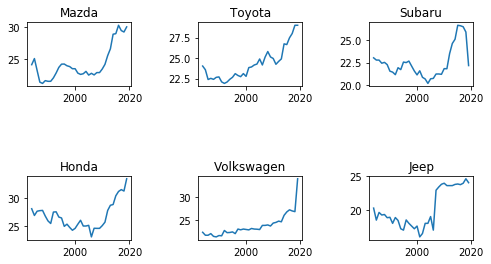

In [34]:
gs = plt.GridSpec(3,8)
fig = plt.figure(figsize=(8,4))
s1 = fig.add_subplot(gs[0:1,:2])
x1 = common_makes_grouped.where(common_makes_grouped['make']=='Mazda').dropna()
s1.plot(x1['year'],x1['comb08'])
plt.title('Mazda')
s2 = fig.add_subplot(gs[0:1,3:5])
x2 = common_makes_grouped.where(common_makes_grouped['make']=='Toyota').dropna()
s2.plot(x2['year'],x2['comb08'])
plt.title('Toyota')
s3 = fig.add_subplot(gs[0:1,6:8])
x3 = common_makes_grouped.where(common_makes_grouped['make']=='Subaru').dropna()
s3.plot(x3['year'],x3['comb08'])
plt.title('Subaru')
s4 = fig.add_subplot(gs[2:3,:2])
x4 = common_makes_grouped.where(common_makes_grouped['make']=='Honda').dropna()
s4.plot(x4['year'],x4['comb08'])
plt.title('Honda')
s5 = fig.add_subplot(gs[2:3,3:5])
x5 = common_makes_grouped.where(common_makes_grouped['make']=='Volkswagen').dropna()
s5.plot(x5['year'],x5['comb08'])
plt.title('Volkswagen')
s6 = fig.add_subplot(gs[2:3,6:8])
x6 = common_makes_grouped.where(common_makes_grouped['make']=='Jeep').dropna()
s6.plot(x6['year'],x6['comb08'])
plt.title('Jeep')
plt.savefig('pyplot6.png')
plt.show()

In [35]:
X = np.array(vehicles_nothybrid['displ']).reshape((vehicles_nothybrid.shape[0],1))
y = np.array(vehicles_nothybrid['comb08'])
X.shape, y.shape

((36385, 1), (36385,))

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25469, 1), (10916, 1), (25469,), (10916,))

In [37]:
svr = svm.SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr.score(X_test,y_test)

0.7026409744341677

In [39]:
y_pred = svr.predict(X_test)
y_pred

array([24.10029631, 19.10042911, 20.50454926, ..., 24.83033464,
       15.73880859, 17.10019186])

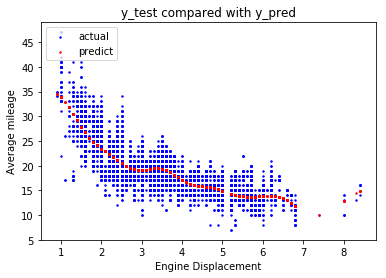

In [40]:
y_pred = svr.predict(X_test)
plt.title("y_test compared with y_pred")
plt.scatter(X_test,y_test,color='blue',s=2)
plt.scatter(X_test,y_pred,color='red',s=2)
plt.xlabel('Engine Displacement')
plt.ylabel('Average mileage')
tip=['actual','predict']
plt.legend(tip,loc=2)
plt.savefig('svm1.png')
plt.show()

In [41]:
vehicles_fin = pd.DataFrame(vehicles_nothybrid[['displ','comb08']])
vehicles_fin = vehicles_fin.where(vehicles_fin['displ']<=7).dropna()
vehicles_fin = vehicles_fin.where(vehicles_fin['comb08']<=40).dropna()
vehicles_fin.shape

(36295, 2)

In [42]:
X = np.array(vehicles_fin['displ']).reshape((vehicles_fin.shape[0],1))
y = np.array(vehicles_fin['comb08'])
X.shape, y.shape

((36295, 1), (36295,))

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25406, 1), (10889, 1), (25406,), (10889,))

In [44]:
svr = svm.SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
svr.score(X_test,y_test)

0.6865842034708052

In [46]:
y_pred = svr.predict(X_test)
y_pred

array([16.09960124, 14.83633504, 14.30151156, ..., 26.67954862,
       19.10006016, 13.90006728])

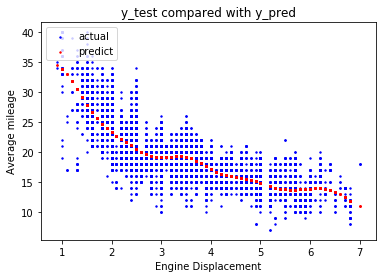

In [47]:
plt.title("y_test compared with y_pred")
plt.scatter(X_test,y_test,color='blue',s=2)
plt.scatter(X_test,y_pred,color='red',s=2)
plt.xlabel('Engine Displacement')
plt.ylabel('Average mileage')
tip=['actual','predict']
plt.legend(tip,loc=2)
plt.savefig('svm2.png')
plt.show()